In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/CSE 475 Project/Hotel Reservations.csv")

print(df.head())
print(df.info())


  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [ ]:
df.drop("Booking_ID", axis=1, inplace=True)
df.drop("arrival_year", axis=1, inplace=True)
df.drop("arrival_date", axis=1, inplace=True)

               no_of_adults                                               \
                      count      mean       std  min  25%  50%  75%  max   
booking_status                                                             
Canceled            11885.0  1.909550  0.486243  0.0  2.0  2.0  2.0  4.0   
Not_Canceled        24390.0  1.813489  0.530993  0.0  2.0  2.0  2.0  4.0   

               no_of_children            ... avg_price_per_room         \
                        count      mean  ...                75%    max   
booking_status                           ...                             
Canceled              11885.0  0.124358  ...             126.36  540.0   
Not_Canceled          24390.0  0.095982  ...             119.10  375.5   

               no_of_special_requests                                          \
                                count      mean       std  min  25%  50%  75%   
booking_status                                                                  
Cance

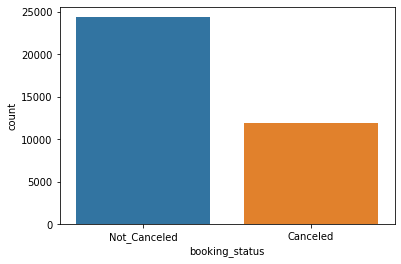

<Figure size 432x288 with 0 Axes>

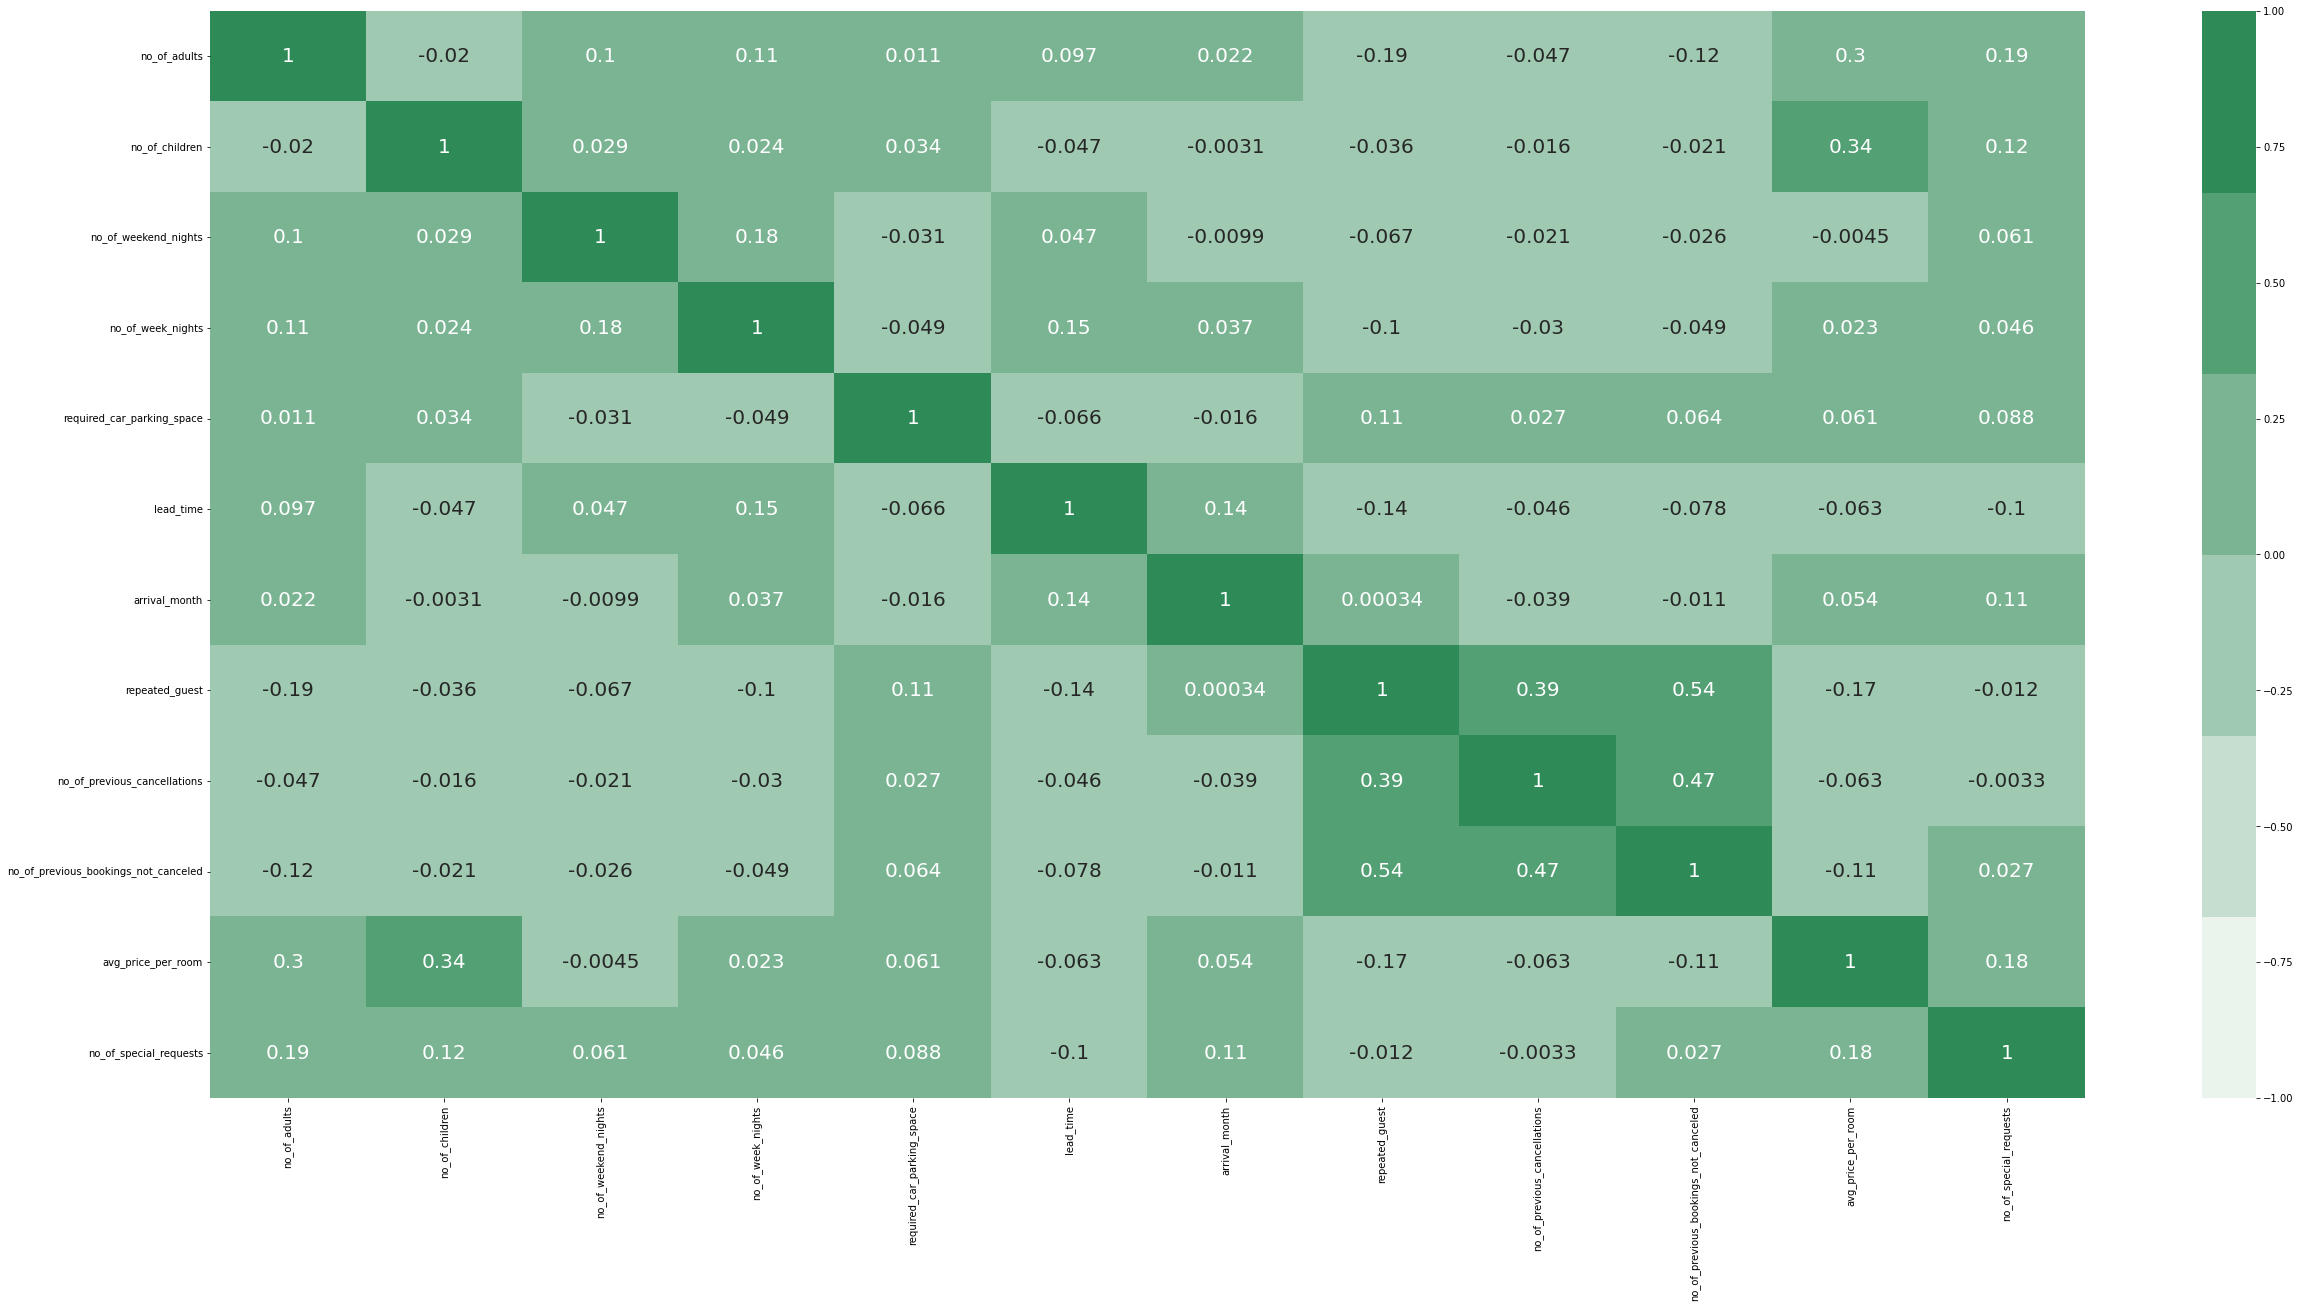

In [ ]:

print(df.groupby("booking_status").describe())

sns.countplot(data = df, x = "booking_status")

plt.figure("New Figure")
f, ax = plt.subplots(figsize=(42, 20))
cmap = sns.light_palette("seagreen")
sns.heatmap(df.corr(), annot=True , cmap=cmap, vmax=1,vmin=-1, annot_kws={"size": 20})

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

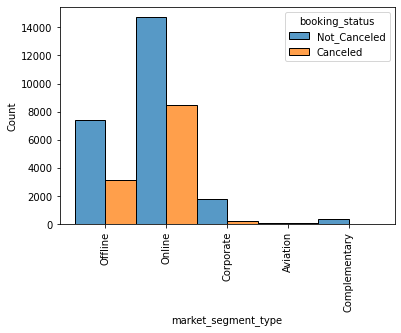

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(binwidth=0.5, x="market_segment_type", hue="booking_status", data=df, stat="count", multiple="dodge")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

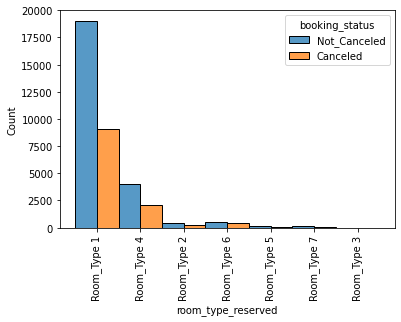

In [ ]:
sns.histplot(binwidth=0.5, x="room_type_reserved", hue="booking_status", data=df, stat="count", multiple="dodge")
plt.xticks(rotation=90)

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

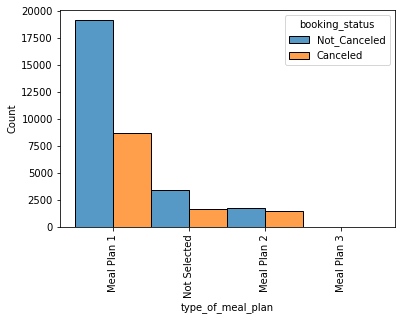

In [ ]:
sns.histplot(binwidth=0.5, x="type_of_meal_plan", hue="booking_status", data=df, stat="count", multiple="dodge")
plt.xticks(rotation=90)

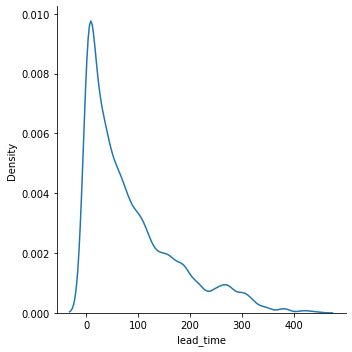

In [ ]:
sns.displot(data=df, x="lead_time", kind="kde")

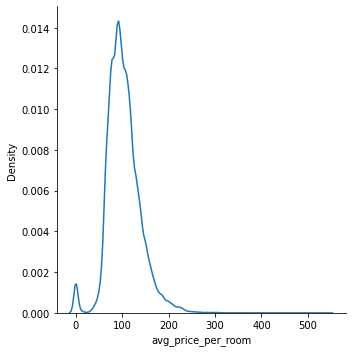

In [ ]:
sns.displot(data=df, x="avg_price_per_room", kind="kde")

In [ ]:
print("\nNumber of duplicate rows =",list(df.duplicated()).count(True))
df=df.drop_duplicates()


Number of duplicate rows = 10477


In [ ]:
from sklearn.preprocessing import LabelEncoder

class_encoder = LabelEncoder()
class_encoder.fit(df['booking_status'])
class_values = class_encoder.transform(df['booking_status'])

print("\nEncoding booking_status values:\n")
class_unique_values = df["booking_status"].unique()
encoded_unique_values = pd.DataFrame(class_values)[0].unique()
#print(encoded_unique_values)
for i in range(len(class_unique_values)):
    print(encoded_unique_values[i],"=",class_unique_values[i])
print("\n")

labels=df['booking_status']
df.drop("booking_status", axis=1, inplace=True)

df['booking_status']= class_values
print(df.head())
df.drop("booking_status", axis=1, inplace=True)


Encoding booking_status values:

1 = Not_Canceled
0 = Canceled


   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1      

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-11-89b47060a4c0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['booking_status']= class_values
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(

In [ ]:
encoder=LabelEncoder()
encoder.fit(df['type_of_meal_plan'])
encoded_values=encoder.transform(df['type_of_meal_plan'])
df['type_of_meal_plan']=encoded_values

encoder.fit(df['room_type_reserved'])
encoded_values=encoder.transform(df['room_type_reserved'])
df['room_type_reserved']=encoded_values

encoder.fit(df['market_segment_type'])
encoded_values=encoder.transform(df['market_segment_type'])
df['market_segment_type']=encoded_values

<ipython-input-12-1ae44db3c0dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type_of_meal_plan']=encoded_values
<ipython-input-12-1ae44db3c0dd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['room_type_reserved']=encoded_values
<ipython-input-12-1ae44db3c0dd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = ss.fit_transform(df)
df

array([[ 0.20545022, -0.3062648 ,  0.1286525 , ..., -0.10312042,
        -1.07763841, -0.91244433],
       [ 0.20545022, -0.3062648 ,  1.25525712, ..., -0.10312042,
         0.0225717 ,  0.31330233],
       [-1.68680426, -0.3062648 ,  1.25525712, ..., -0.10312042,
        -1.20962139, -0.91244433],
       ...,
       [ 0.20545022, -0.3062648 ,  0.1286525 , ..., -0.10312042,
        -0.39264675,  1.53904899],
       [ 0.20545022, -0.3062648 ,  1.25525712, ..., -0.10312042,
        -0.19625608,  1.53904899],
       [ 0.20545022, -0.3062648 , -0.99795212, ..., -0.10312042,
        -0.29893884, -0.91244433]])

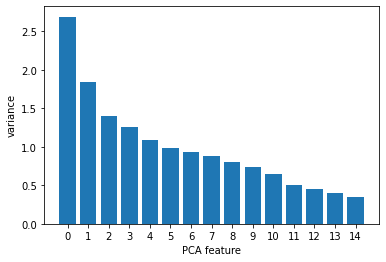

In [ ]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()

#df.drop("class", axis=1, inplace=True)

pca.fit(df)

df= pca.transform(df)

features = range(pca.n_components_)


plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [ ]:
list_CV_scr=[]
list_Test_acc_score=[]

In [ ]:
X=df
y=class_values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)


				 K-Neighbors Classifier

Best Accuracy:  0.8237845880834426
Best Parameters:  {'n_neighbors': 25}

Test accuracy:  0.8240310077519379

2 unique target values:  ['Not_Canceled' 'Canceled']

Confusion Matrix for 2 unique target values:
 [[3364  311]
 [ 597  888]]


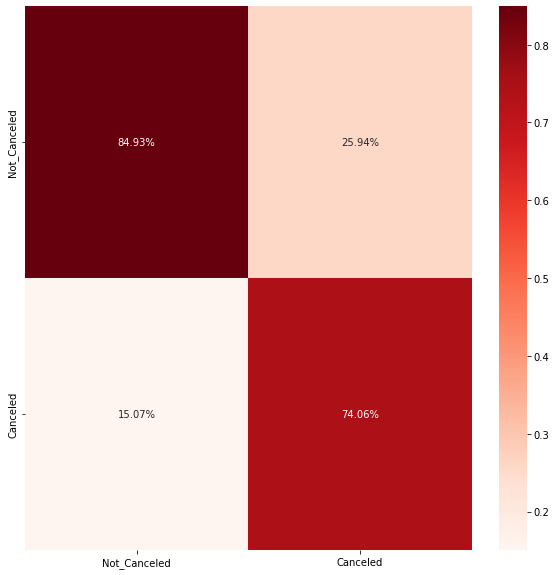

In [ ]:
print("\n\t\t\t\t K-Neighbors Classifier\n")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# Define a series of parameters
params = dict(n_neighbors=[5,10,15,20,25])

# Create a random search cv object and fit it to the data
grid_search = GridSearchCV(knn, params, cv=5, n_jobs=-1, verbose=0)
grid_search_results = grid_search.fit(X, y)

# Print results
print("Best Accuracy: ",grid_search_results.best_score_)
print("Best Parameters: ",grid_search_results.best_params_)

list_CV_scr.append(grid_search_results.best_score_)

knn = KNeighborsClassifier(n_neighbors=grid_search_results.
                           best_params_['n_neighbors'])

knn.fit(X_train, y_train)

"""
k_folds = KFold(n_splits = 5)

scores = cross_val_score(knn, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("\nAverage CV Score: ", scores.mean())
list_CV_scr.append(grid_search_results.best_score_)
"""

print('\nTest accuracy: ',knn.score(X_test, y_test))
list_Test_acc_score.append(knn.score(X_test, y_test))

y_pred_test = knn.predict(X_test)
y_test_decoded = class_encoder.inverse_transform(y_test)
y_pred_test=class_encoder.inverse_transform(y_pred_test)

CM = confusion_matrix(y_test_decoded, y_pred_test, labels=class_unique_values)
print("\n2 unique target values: ",class_unique_values)
print("\nConfusion Matrix for 2 unique target values:\n",CM)
plt.figure(figsize = (10,10))
sns.heatmap(CM/np.sum(CM, axis=0), fmt='.2%', cmap='Reds', annot=True, cbar=True,
            xticklabels=class_unique_values, yticklabels=class_unique_values)


				 Adaboost Classifier

Best Accuracy:  0.8117292726942156
Best Parameters:  {'learning_rate': 1.0, 'n_estimators': 500}

Test accuracy:  0.8155038759689922

2 unique target values:  ['Not_Canceled' 'Canceled']

Confusion Matrix for 2 unique target values:
 [[3348  327]
 [ 625  860]]


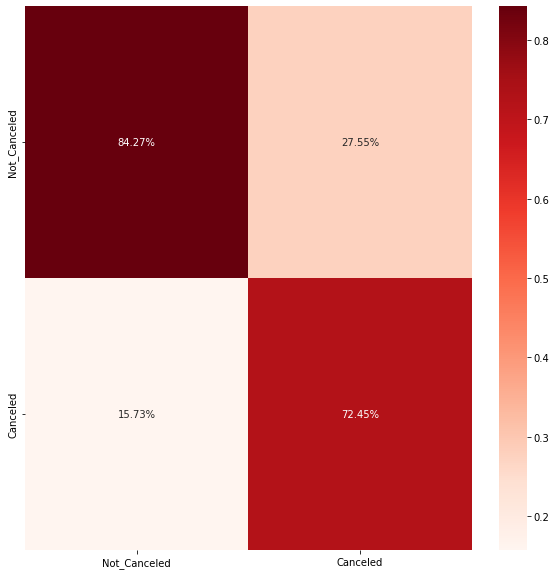

In [ ]:
print("\n\t\t\t\t Adaboost Classifier\n")

from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score

adb = AdaBoostClassifier()

# Define a series of parameters
params = dict(n_estimators= [100, 250, 500], learning_rate = [0.01, 0.1, 1.0])

# Create a random search cv object and fit it to the data
grid_search = GridSearchCV(adb, params, cv=5, n_jobs=-1, verbose=0)
grid_search_results = grid_search.fit(X, y)

# Print results
print("Best Accuracy: ",grid_search_results.best_score_)
print("Best Parameters: ",grid_search_results.best_params_)

list_CV_scr.append(grid_search_results.best_score_)

adb = AdaBoostClassifier(n_estimators=grid_search_results.best_params_['n_estimators'],
                         learning_rate=grid_search_results.best_params_['learning_rate'])

adb.fit(X_train,y_train)

print('\nTest accuracy: ',adb.score(X_test, y_test))
list_Test_acc_score.append(adb.score(X_test, y_test))

y_pred_test = adb.predict(X_test)
y_pred_test=class_encoder.inverse_transform(y_pred_test)
CM = confusion_matrix(y_test_decoded, y_pred_test, labels=class_unique_values)
print("\n2 unique target values: ",class_unique_values)
print("\nConfusion Matrix for 2 unique target values:\n",CM)
plt.figure(figsize = (10,10))
sns.heatmap(CM/np.sum(CM, axis=0), fmt='.2%', cmap='Reds', annot=True, cbar=True,
            xticklabels=class_unique_values, yticklabels=class_unique_values)


				 SVM



/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Accuracy:  0.8383594711432268
Best Parameters:  {'C': 50, 'kernel': 'rbf'}

Test accuracy:  0.8408914728682171

2 unique target values:  ['Not_Canceled' 'Canceled']

Confusion Matrix for 2 unique target values:
 [[3393  282]
 [ 539  946]]


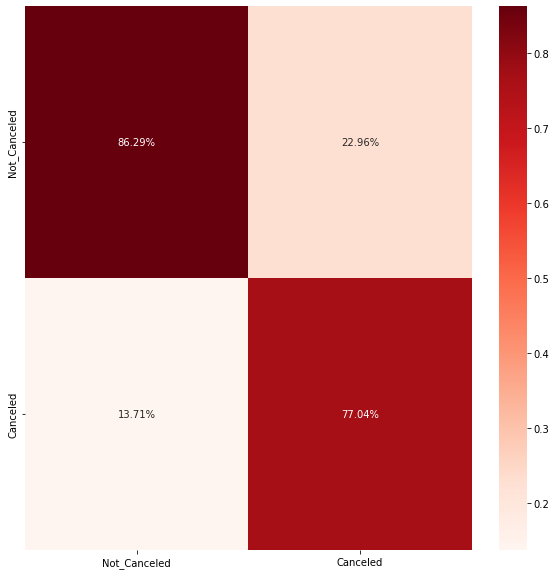

In [ ]:
print("\n\t\t\t\t SVM\n")

from sklearn import svm

svm1 = svm.SVC()

# Define a series of parameters
params = dict(C=[50,20,10,1],
              kernel=['linear', 'poly', 'rbf', 'sigmoid'])

# Create a random search cv object and fit it to the data
grid_search = GridSearchCV(svm1, params, cv=5, n_jobs=-1, verbose=0)
grid_search_results = grid_search.fit(X, y)

# Print results
print("Best Accuracy: ",grid_search_results.best_score_)
print("Best Parameters: ",grid_search_results.best_params_)

list_CV_scr.append(grid_search_results.best_score_)

svm = svm.SVC(C = grid_search_results.
                           best_params_['C'], kernel = grid_search_results.
                           best_params_['kernel'])

svm.fit(X_train, y_train)

print('\nTest accuracy: ',svm.score(X_test, y_test))
list_Test_acc_score.append(svm.score(X_test, y_test))

y_pred_test = svm.predict(X_test)
y_test_decoded = class_encoder.inverse_transform(y_test)
y_pred_test=class_encoder.inverse_transform(y_pred_test)

CM = confusion_matrix(y_test_decoded, y_pred_test, labels=class_unique_values)
print("\n2 unique target values: ",class_unique_values)
print("\nConfusion Matrix for 2 unique target values:\n",CM)
plt.figure(figsize = (10,10))
sns.heatmap(CM/np.sum(CM, axis=0), fmt='.2%', cmap='Reds', annot=True, cbar=True,
            xticklabels=class_unique_values, yticklabels=class_unique_values)


				 Voting Classifier



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFailedWa

Cross Validation Scores:  [0.84302326 0.82403101 0.83643411 0.8364024  0.83756542]

Average CV Score:  0.8354912390629157

Test accuracy:  0.836046511627907

2 unique target values:  ['Not_Canceled' 'Canceled']

Confusion Matrix for 2 unique target values:
 [[3377  298]
 [ 548  937]]


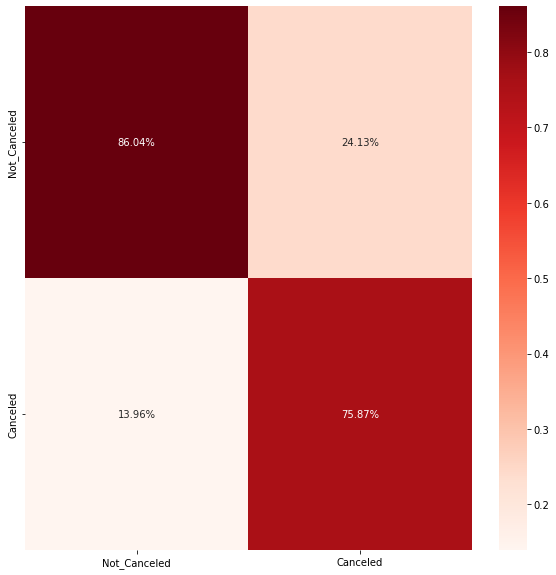

In [ ]:
print("\n\t\t\t\t Voting Classifier\n")

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import VotingClassifier

svm = svm.SVC(C = 50, kernel='rbf')
knn = KNN(n_neighbors=15)
dt = DecisionTreeClassifier()

# Define a series of parameters
params = dict(criterion=['gini', 'entropy', 'log_loss'])

grid_search = GridSearchCV(dt, params, cv=5, n_jobs=-1, verbose=0)
grid_search_results = grid_search.fit(X, y)

dt = DecisionTreeClassifier(criterion = grid_search_results.
                            best_params_['criterion'])


# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Support Vector Machine',svm),('K Nearest Neighbours', knn),('Classification Tree', dt)]

"""
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    # Evaluate the accuracy of clf on the test set
    print('\n{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))
"""

    
vc = VotingClassifier(estimators=classifiers)

vc.fit(X_train, y_train)

y_pred_test = vc.predict(X_test)

k_folds = KFold(n_splits = 5)
scores = cross_val_score(vc, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("\nAverage CV Score: ", scores.mean())
list_CV_scr.append(scores.mean())

print('\nTest accuracy: ',vc.score(X_test, y_test))
list_Test_acc_score.append(vc.score(X_test, y_test))

y_pred_test=class_encoder.inverse_transform(y_pred_test)
CM = confusion_matrix(y_test_decoded, y_pred_test, labels=class_unique_values)
print("\n2 unique target values: ",class_unique_values)
print("\nConfusion Matrix for 2 unique target values:\n",CM)
plt.figure(figsize = (10,10))
sns.heatmap(CM/np.sum(CM, axis=0), fmt='.2%', cmap='Reds', annot=True, cbar=True,
            xticklabels=class_unique_values, yticklabels=class_unique_values)


				 RandomForest Classifier



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", l

Best Accuracy:  0.8308782048681389
Best Parameters:  {'criterion': 'entropy', 'n_estimators': 500}

Test accuracy:  0.8300387596899225

2 unique target values:  ['Not_Canceled' 'Canceled']

Confusion Matrix for 2 unique target values:
 [[3369  306]
 [ 571  914]]


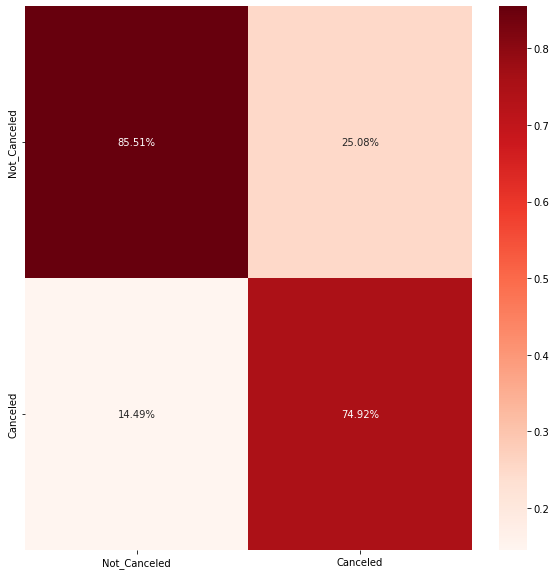

In [ ]:
print("\n\t\t\t\t RandomForest Classifier\n")

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Define a series of parameters
params = dict(n_estimators=[50,100,250,500], criterion=['gini', 'entropy', 'log_loss'])

# Create a random search cv object and fit it to the data
grid_search = GridSearchCV(rf, params, cv=5, n_jobs=-1, verbose=0)
grid_search_results = grid_search.fit(X, y)

# Print results
print("Best Accuracy: ",grid_search_results.best_score_)
print("Best Parameters: ",grid_search_results.best_params_)

list_CV_scr.append(grid_search_results.best_score_)

rf = RandomForestClassifier(n_estimators = grid_search_results.
                           best_params_['n_estimators'], criterion =
                           grid_search_results.best_params_['criterion'])

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

print('\nTest accuracy: ',rf.score(X_test, y_test))
list_Test_acc_score.append(rf.score(X_test, y_test))

y_pred_test=rf.predict(X_test)
y_pred_test=class_encoder.inverse_transform(y_pred_test)
CM = confusion_matrix(y_test_decoded, y_pred_test, labels=class_unique_values)
print("\n2 unique target values: ",class_unique_values)
print("\nConfusion Matrix for 2 unique target values:\n",CM)
plt.figure(figsize = (10,10))
sns.heatmap(CM/np.sum(CM, axis=0), fmt='.2%', cmap='Reds', annot=True, cbar=True,
            xticklabels=class_unique_values, yticklabels=class_unique_values)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_1 = y_train.reshape(len(y_train), 1)
one_2 = y_test.reshape(len(y_test), 1)
one_3 = y.reshape(len(y), 1)

### One hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded_y_train = onehot_encoder.fit_transform(one_1)
onehot_encoded_y_test = onehot_encoder.fit_transform(one_2)
onehot_encoded_y = onehot_encoder.fit_transform(one_3)


				 Deep Neural Network without batch processing



<ipython-input-23-10d622cd8ea1>:33: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model_)
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/30
807/807 [==============================] - 2s 2ms/step - loss: 0.4176 - accuracy: 0.8072
Epoch 2/30
807/807 [==============================] - 1s 2ms/step - loss: 0.3878 - accuracy: 0.8247
Epoch 3/30
807/807 [==============================] - 1s 2ms/step - loss: 0.3778 - accuracy: 0.8336
Epoch 4/30
807/807 [==============================] - 1s 2ms/step - loss: 0.3699 - accuracy: 0.8376
Epoch 5/30
807/807 [==============================] - 1s 2ms/step - loss: 0.3625 - accuracy: 0.8404
Epoch 6/30
807/807 [==============================] - 1s 2ms/step - loss: 0.3578 - accuracy: 0.8397
Epoch 7/30
807/807 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8432
Epoch 8/30
807/807 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8449
Epoch 9/30
807/807 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8455
Epoch 10/30
807/807 [==============================] - 1s 2ms/step - loss: 0.3410 - accuracy: 0.8482

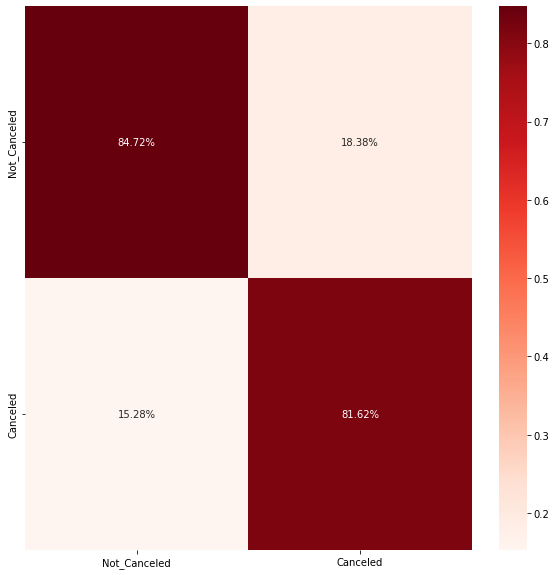

In [ ]:
#%%

print("\n\t\t\t\t Deep Neural Network without batch processing\n")

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

def create_model_():
    # Instantiate a sequential model
    model = Sequential()
      
    # Add 3 dense layers of 128, 64 and 32 neurons each
    model.add(Dense(128, input_shape=(15,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
      
    # Add a dense layer with as many neurons as competitors
    model.add(Dense(2, activation='softmax'))
      
    # Compile your model using categorical_crossentropy loss
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


#%%

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=create_model_)

# Define a series of parameters
params = dict(epochs=[30,40,50,60,100])

# Create a random search cv object and fit it to the data
grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=0)
grid_search_results = grid_search.fit(X, onehot_encoded_y)

# Print results
print("Best Accuracy: ",grid_search_results.best_score_)
print("Best Parameters: ",grid_search_results.best_params_)

list_CV_scr.append(grid_search_results.best_score_)

#%%

model = create_model_()

print(model.summary())
# Fit model to the training data for 200 epochs
model.fit(X_train, onehot_encoded_y_train, 
           epochs=grid_search_results.best_params_['epochs'], verbose=0) 

#list_Test_DNN_acc_score_1=[]

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(X_test, onehot_encoded_y_test)

print('\nTest Accuracy:', accuracy[1])
list_Test_acc_score.append(accuracy[1])

y_pred_test=model.predict(X_test)
y_pred_test = onehot_encoder.inverse_transform(y_pred_test)
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
y_pred_test = y_pred_test.flatten()

y_pred_test=class_encoder.inverse_transform(y_pred_test)
CM = confusion_matrix(y_test_decoded, y_pred_test, labels=class_unique_values)
print("\n2 unique target values: ",class_unique_values)
print("\nConfusion Matrix for 2 unique target values:\n",CM)
plt.figure(figsize = (10,10))
sns.heatmap(CM/np.sum(CM, axis=0), fmt='.2%', cmap='Reds', annot=True, cbar=True,
            xticklabels=class_unique_values, yticklabels=class_unique_values)



				 Deep Neural Network with batch processing



<ipython-input-24-e9ef35a17183>:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn=create_model)
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/30
807/807 [==============================] - 2s 2ms/step - loss: 0.4194 - accuracy: 0.8125
Epoch 2/30
807/807 [==============================] - 2s 2ms/step - loss: 0.3908 - accuracy: 0.8272
Epoch 3/30
807/807 [==============================] - 2s 2ms/step - loss: 0.3830 - accuracy: 0.8319
Epoch 4/30
807/807 [==============================] - 2s 2ms/step - loss: 0.3766 - accuracy: 0.8337
Epoch 5/30
807/807 [==============================] - 2s 2ms/step - loss: 0.3704 - accuracy: 0.8372
Epoch 6/30
807/807 [==============================] - 2s 2ms/step - loss: 0.3672 - accuracy: 0.8374
Epoch 7/30
807/807 [==============================] - 2s 2ms/step - loss: 0.3622 - accuracy: 0.8409
Epoch 8/30
807/807 [==============================] - 2s 2ms/step - loss: 0.3590 - accuracy: 0.8408
Epoch 9/30
807/807 [==============================] - 2s 2ms/step - loss: 0.3554 - accuracy: 0.8413
Epoch 10/30
807/807 [==============================] - 2s 2ms/step - loss: 0.3514 - accuracy: 0.8425

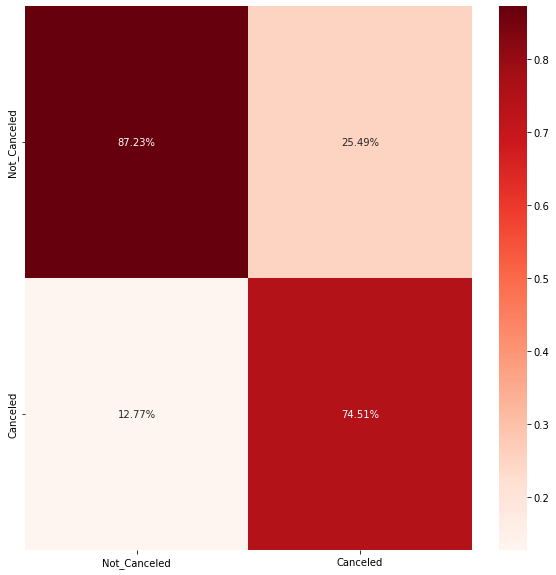

In [ ]:
print("\n\t\t\t\t Deep Neural Network with batch processing\n")

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical

def create_model():
# Instantiate a sequential model
    model2 = Sequential()
      
    # Add 3 dense layers of 128, 64 and 32 neurons each
    model2.add(Dense(128, input_shape=(15,), activation='relu'))
    model2.add(BatchNormalization())
    model2.add(Dense(64, activation='relu'))
    model2.add(Dense(32, activation='relu'))
      
    # Add a dense layer with as many neurons as competitors
    model2.add(Dense(2, activation='softmax'))
      
    # Compile model using categorical_crossentropy loss
    model2.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    
    return model2

#print(model2.summary())


#%%

model2 = KerasClassifier(build_fn=create_model)

# Define a series of parameters
params = dict(epochs=[30,40,50],
              batch_size=[32,64,128,413])

# Create a random search cv object and fit it to the data
grid_search = GridSearchCV(model2, params, cv=5, n_jobs=-1, verbose=0)
grid_search_results = grid_search.fit(X, onehot_encoded_y)

# Print results
print("Best Accuracy: ",grid_search_results.best_score_)
print("Best Parameters: ",grid_search_results.best_params_)

list_CV_scr.append(grid_search_results.best_score_)

#%%

model2 = create_model()

# Fit model to the training data for 200 epochs
model2.fit(X_train, onehot_encoded_y_train, 
           epochs=grid_search_results.best_params_['epochs'],
           batch_size=grid_search_results.best_params_['batch_size'], verbose=0)

# Evaluate model accuracy on the test data
accuracy = model2.evaluate(X_test, onehot_encoded_y_test)

#list_Test_DNN_acc_score_2=[]

# Print accuracy
print('\nTest Accuracy:', accuracy[1])
list_Test_acc_score.append(accuracy[1])

y_pred_test=model2.predict(X_test)
y_pred_test = onehot_encoder.inverse_transform(y_pred_test)
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
y_pred_test = y_pred_test.flatten()

y_pred_test=class_encoder.inverse_transform(y_pred_test)
CM = confusion_matrix(y_test_decoded, y_pred_test, labels=class_unique_values)
print("\n2 unique target values: ",class_unique_values)
print("\nConfusion Matrix for 2 unique target values:\n",CM)
plt.figure(figsize = (10,10))
sns.heatmap(CM/np.sum(CM, axis=0), fmt='.2%', cmap='Reds', annot=True, cbar=True,
            xticklabels=class_unique_values, yticklabels=class_unique_values)

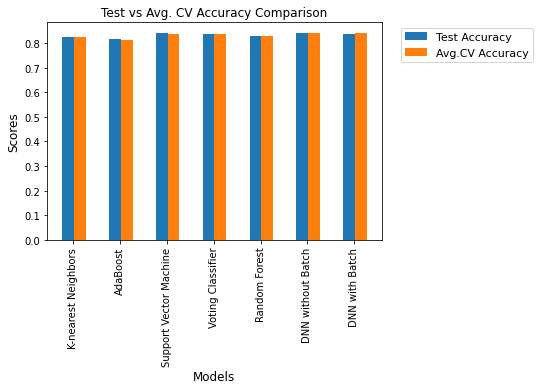

In [ ]:
import matplotlib.pyplot as plt
plt.figure("Figure 2")

X = ['K-nearest Neighbors','AdaBoost','Support Vector Machine','Voting Classifier','Random Forest','DNN without Batch', 'DNN with Batch']
X_axis = np.arange(len(X))
  
plt.bar(X_axis + 0.00, list_Test_acc_score, width = 0.25, label = 'Test Accuracy')
plt.bar(X_axis + 0.25, list_CV_scr, width = 0.25, label = 'Avg.CV Accuracy')

"""
X.append("DNN")
X_axis = np.arange(len(X))
Y_axis = np.arange(1)
plt.bar(Y_axis + 5, list_Test_DNN_acc_score_1, width = 0.25, color='#00CDCD', label = 'DNN without Batch processiong Test Accuracy')
plt.bar(Y_axis + 5.25, list_Test_DNN_acc_score_2, width = 0.25, color='#CD2626', label = 'DNN with Batch processiong Test Accuracy') 
"""

plt.xticks(X_axis+.11, X, rotation=90)
plt.xlabel("Models",fontsize=12)
plt.ylabel("Scores",fontsize=12)
plt.title("Test vs Avg. CV Accuracy Comparison")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",fontsize=11, title_fontsize=10)
plt.show()

In [ ]:

print("\nModels' Test Accuracy Scores:\n")

for i in range(0,len(X)):
    print(X[i],":", list_Test_acc_score[i])

print("\nModels' Average Cross Validation Scores:\n")

for i in range(0,len(X)):
    print(X[i],":", list_CV_scr[i])


Models' Test Accuracy Scores:

K-nearest Neighbors : 0.8240310077519379
AdaBoost : 0.8155038759689922
Support Vector Machine : 0.8408914728682171
Voting Classifier : 0.836046511627907
Random Forest : 0.8300387596899225
DNN without Batch : 0.8408914804458618
DNN with Batch : 0.8393411040306091

Models' Average Cross Validation Scores:

K-nearest Neighbors : 0.8237845880834426
AdaBoost : 0.8117292726942156
Support Vector Machine : 0.8383594711432268
Voting Classifier : 0.8354912390629157
Random Forest : 0.8308782048681389
DNN without Batch : 0.8408018827438355
DNN with Batch : 0.8432047009468079
